## C S 329E HW8

# Image classification using the FMNIST dataset and PyTorch

## Michel Gonzalez - Mag9989

This is the companion notebook that you will hand in to show that you 
were following along the LinkedIn Learning Video.


# Q1 - Working with FMNIST

Add in the code from the first exercise file that trained a neural network and tested the network on test data.  Use index 23 to test the network.  Was it correct? If not, what class do you think it should have predicted?

In [1]:
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [2]:
from torch._C import TracingState
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                                ])
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download =True, train = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download =True, train = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)



In [3]:
class FMNIST (nn.Module):

  def __init__(self):

    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward (self, x):

    x = x.view(x.shape[0], -1)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)

    return x

model = FMNIST()

In [4]:
from torch import optim

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.01)

num_epochs = 3

for i in range(num_epochs):

  cum_loss = 0

  for images, labels in trainloader:

    optimizer.zero_grad()

    output = model(images)

    loss = criterion(output, labels)

    loss.backward()

    optimizer.step()

    cum_loss += loss.item()

  print(f"Traning loss: {cum_loss/len(trainloader)}")





Traning loss: 1.0341349975513752
Traning loss: 0.5616475922593684
Traning loss: 0.49201103581040145


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

images, labels = next(iter(testloader))

test_image_id = 23

img = images[test_image_id].view(1,784)

with torch.no_grad():

  logps = model(img)

<BarContainer object of 10 artists>

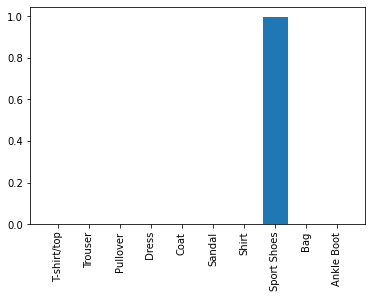

In [6]:
ps = torch.exp(logps)
nps = ps.numpy()[0]
FMNIST_labels = ['T-shirt/top', 'Trouser', 'Pullover', ' Dress', 'Coat', 'Sandal', 'Shirt', 'Sport Shoes', 'Bag', 'Ankle Boot']
plt.xticks(np.arange(10), labels = FMNIST_labels, rotation = 'vertical')
plt.bar(np.arange(10), nps)

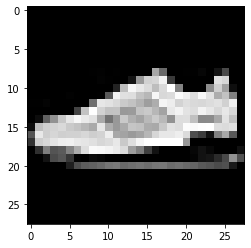

In [7]:
def denormalize(tensor):
  tensor = tensor * 0.5 + 0.5
  return tensor

img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img, cmap = 'gray')

I think that the classifier was correct for this image

# Q2 Tensors

Add in the code from working with Tensors.  Type along with the instructor.

In [8]:
import torch

In [9]:
w = torch.zeros(4, 3)
w

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [10]:
w.size()

torch.Size([4, 3])

In [11]:
w.shape

torch.Size([4, 3])

In [12]:
w = torch.randn(3,4)
w

tensor([[ 1.0489,  0.7899, -1.8661, -0.7692],
        [-0.1590, -1.6144, -0.9722, -1.6303],
        [ 1.3687,  0.3133,  0.2125,  0.5706]])

In [13]:
t = torch.randn_like(w)
t

tensor([[ 0.5458, -0.5508,  0.4456,  0.0403],
        [-1.3119, -0.6464,  0.8553, -0.6457],
        [ 0.6277,  0.2145, -0.5673,  0.3169]])

In [14]:
w.fill_(1)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [15]:
t = w.view(3,4)
t

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [16]:
w.view(3, -1)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [17]:
type(w.numpy())

numpy.ndarray

# Q3 - Autograd

Copy over the code from the Autograd notebook, and execute the cells and enter the code with the instructor.

In [18]:
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [19]:
from torch._C import TracingState
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                                ])
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download =True, train = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download =True, train = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

In [20]:
class FMNIST (nn.Module):

  def __init__(self):

    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward (self, x):

    x = x.view(x.shape[0], -1)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)

    return x

#model = FMNIST()

In [21]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

In [22]:
model[0]

Linear(in_features=784, out_features=128, bias=True)

In [23]:
images, labels = next(iter(trainloader))

images = images.view(images.shape[0], -1)

In [24]:
criterion = nn.NLLLoss()

In [25]:
print('Initial weigts gradient : ', model[0].weight.grad)

Initial weigts gradient :  None


In [26]:
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Initial weights : ', model[0].weight)
print('Initial weigts gradient : ', model[0].weight.grad)

Initial weights :  Parameter containing:
tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
        [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
        [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
        ...,
        [ 0.0018, -0.0295,  0.0085,  ..., -0.0037,  0.0036,  0.0300],
        [-0.0233, -0.0220, -0.0064,  ...,  0.0115, -0.0324, -0.0158],
        [ 0.0309,  0.0066,  0.0125,  ...,  0.0286,  0.0350, -0.0105]],
       requires_grad=True)
Initial weigts gradient :  tensor([[-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030],
        [ 0.0022,  0.0022,  0.0022,  ...,  0.0024,  0.0022,  0.0022],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        ...,
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [ 0.0021,  0.0021,  0.0021,  ...,  0.0022,  0.0021,  0.0021],
        [ 0.0038,  0.0038,  0.0038,  ...,  0.0038,  0.0038,  0.0038]])


# Q4 - Autograd with Tensors

Type the code and execute the cells and enter the code with the instructor.

In [27]:
import torch

In [28]:
w  = torch.randn(4,3,requires_grad = True)

In [29]:
w

tensor([[ 0.7536,  0.9583,  0.7206],
        [ 0.4893, -0.9620, -0.1192],
        [ 1.0489,  0.7899, -1.8661],
        [-0.7692, -0.1590, -1.6144]], requires_grad=True)

In [30]:
w.requires_grad_(False)
w

tensor([[ 0.7536,  0.9583,  0.7206],
        [ 0.4893, -0.9620, -0.1192],
        [ 1.0489,  0.7899, -1.8661],
        [-0.7692, -0.1590, -1.6144]])

In [31]:
w.requires_grad_(True)
w

tensor([[ 0.7536,  0.9583,  0.7206],
        [ 0.4893, -0.9620, -0.1192],
        [ 1.0489,  0.7899, -1.8661],
        [-0.7692, -0.1590, -1.6144]], requires_grad=True)

In [32]:
y = torch.exp(w)

print(y)

tensor([[2.1246, 2.6072, 2.0556],
        [1.6312, 0.3821, 0.8876],
        [2.8547, 2.2033, 0.1547],
        [0.4634, 0.8530, 0.1990]], grad_fn=<ExpBackward0>)


In [33]:
print(y.grad_fn)

In [34]:
outp = y.mean()
print(outp)

tensor(1.3680, grad_fn=<MeanBackward0>)


In [35]:
print(w.grad)

None


In [36]:
outp.backward()

In [37]:
print(w.grad)

tensor([[0.1770, 0.2173, 0.1713],
        [0.1359, 0.0318, 0.0740],
        [0.2379, 0.1836, 0.0129],
        [0.0386, 0.0711, 0.0166]])


In [38]:
print(w.detach())

tensor([[ 0.7536,  0.9583,  0.7206],
        [ 0.4893, -0.9620, -0.1192],
        [ 1.0489,  0.7899, -1.8661],
        [-0.7692, -0.1590, -1.6144]])


In [39]:
print(outp.requires_grad)

with torch.no_grad():

  outp = (w + y).mean()

print(outp.requires_grad)


True
False


# Q5 - Using Optimizers

Copy over the code from the using optimizer notebook, and execute the cells and enter the code with the instructor.

In [40]:
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [41]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                                ])
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download =True, train = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download =True, train = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

class FMNIST (nn.Module):

  def __init__(self):

    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward (self, x):

    x = x.view(x.shape[0], -1)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)

    return x

#model = FMNIST()


In [42]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

In [43]:
images, labels = next(iter(trainloader))

images = images.view(images.shape[0], -1)

In [44]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [45]:
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Initial weights : ', model[0].weight)
print('Initial weigts gradient : ', model[0].weight.grad)

Initial weights :  Parameter containing:
tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
        [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
        [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
        ...,
        [ 0.0018, -0.0295,  0.0085,  ..., -0.0037,  0.0036,  0.0300],
        [-0.0233, -0.0220, -0.0064,  ...,  0.0115, -0.0324, -0.0158],
        [ 0.0309,  0.0066,  0.0125,  ...,  0.0286,  0.0350, -0.0105]],
       requires_grad=True)
Initial weigts gradient :  tensor([[-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030],
        [ 0.0022,  0.0022,  0.0022,  ...,  0.0024,  0.0022,  0.0022],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        ...,
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [ 0.0021,  0.0021,  0.0021,  ...,  0.0022,  0.0021,  0.0021],
        [ 0.0038,  0.0038,  0.0038,  ...,  0.0038,  0.0038,  0.0038]])


In [46]:
optimizer.step()

In [47]:
print('Initial weights : ', model[0].weight)
print('Initial weigts gradient : ', model[0].weight.grad)

Initial weights :  Parameter containing:
tensor([[-0.0002,  0.0192, -0.0294,  ...,  0.0220,  0.0038,  0.0021],
        [-0.0198, -0.0150, -0.0105,  ..., -0.0203, -0.0060, -0.0300],
        [-0.0202,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
        ...,
        [ 0.0018, -0.0296,  0.0085,  ..., -0.0037,  0.0036,  0.0300],
        [-0.0233, -0.0221, -0.0064,  ...,  0.0115, -0.0324, -0.0158],
        [ 0.0309,  0.0065,  0.0125,  ...,  0.0285,  0.0349, -0.0106]],
       requires_grad=True)
Initial weigts gradient :  tensor([[-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030],
        [ 0.0022,  0.0022,  0.0022,  ...,  0.0024,  0.0022,  0.0022],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        ...,
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [ 0.0021,  0.0021,  0.0021,  ...,  0.0022,  0.0021,  0.0021],
        [ 0.0038,  0.0038,  0.0038,  ...,  0.0038,  0.0038,  0.0038]])


In [48]:
optimizer.zero_grad()

In [49]:
print('Initial weights : ', model[0].weight)
print('Initial weigts gradient : ', model[0].weight.grad)

Initial weights :  Parameter containing:
tensor([[-0.0002,  0.0192, -0.0294,  ...,  0.0220,  0.0038,  0.0021],
        [-0.0198, -0.0150, -0.0105,  ..., -0.0203, -0.0060, -0.0300],
        [-0.0202,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
        ...,
        [ 0.0018, -0.0296,  0.0085,  ..., -0.0037,  0.0036,  0.0300],
        [-0.0233, -0.0221, -0.0064,  ...,  0.0115, -0.0324, -0.0158],
        [ 0.0309,  0.0065,  0.0125,  ...,  0.0285,  0.0349, -0.0106]],
       requires_grad=True)
Initial weigts gradient :  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [50]:
model = FMNIST()

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.01)

num_epochs = 1

for i in range(num_epochs):

  cum_loss = 0
  batch_num = 0

  for batch_num, (images, labels)  in enumerate(trainloader, 1):

    optimizer.zero_grad()

    output = model(images)

    loss = criterion(output, labels)

    loss.backward()

    optimizer.step()

    cum_loss += loss.item()
    print(f'Batch : {batch_num}, Loss : {loss.item()}')

  print(f"Traning loss: {cum_loss/len(trainloader)}")

Batch : 1, Loss : 2.2870397567749023
Batch : 2, Loss : 2.304734468460083
Batch : 3, Loss : 2.28812313079834
Batch : 4, Loss : 2.2898640632629395
Batch : 5, Loss : 2.2802863121032715
Batch : 6, Loss : 2.2768282890319824
Batch : 7, Loss : 2.2971038818359375
Batch : 8, Loss : 2.272695779800415
Batch : 9, Loss : 2.266519546508789
Batch : 10, Loss : 2.276360273361206
Batch : 11, Loss : 2.285900115966797
Batch : 12, Loss : 2.2687723636627197
Batch : 13, Loss : 2.2825448513031006
Batch : 14, Loss : 2.269296407699585
Batch : 15, Loss : 2.251699447631836
Batch : 16, Loss : 2.2710673809051514
Batch : 17, Loss : 2.2565464973449707
Batch : 18, Loss : 2.247075080871582
Batch : 19, Loss : 2.242631673812866
Batch : 20, Loss : 2.2493398189544678
Batch : 21, Loss : 2.2490806579589844
Batch : 22, Loss : 2.239584445953369
Batch : 23, Loss : 2.2394418716430664
Batch : 24, Loss : 2.252643585205078
Batch : 25, Loss : 2.2172629833221436
Batch : 26, Loss : 2.236956834793091
Batch : 27, Loss : 2.22307038307189

# Q5 - Troubleshooting

Copy over the code from the using troubleshooting notebook, and execute the cells and enter the code with the instructor.

In [51]:
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [52]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                                ])
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download =True, train = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download =True, train = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

In [53]:
class FMNIST (nn.Module):

  def __init__(self):

    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward (self, x):

    x = x.view(x.shape[0], -1)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)

    return x

model = FMNIST()

In [54]:
from IPython.core.debugger import set_trace

In [55]:
from torch import optim

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.01)

num_epochs = 3

for i in range(num_epochs):

  cum_loss = 0

  for images, labels in trainloader:

    #set_trace()

    optimizer.zero_grad()

    output = model(images)

    loss = criterion(output, labels)

    loss.backward()

    optimizer.step()

    cum_loss += loss.item()

  print(f"Traning loss: {cum_loss/len(trainloader)}")

Traning loss: 1.0341349975513752
Traning loss: 0.5616475922593684
Traning loss: 0.49201103581040145


In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

images, labels = next(iter(testloader))

test_image_id = 0

img = images[test_image_id].view(1,784)

with torch.no_grad():

  logps = model(img)

In [57]:
ps = torch.exp(logps)
ps

tensor([[2.4768e-04, 3.8413e-04, 9.7440e-01, 6.1042e-05, 1.6840e-02, 7.7658e-06,
         7.9611e-03, 9.7778e-09, 9.4389e-05, 4.3540e-07]])

In [58]:
nps = ps.numpy()[0]
nps

array([2.4768463e-04, 3.8412723e-04, 9.7440356e-01, 6.1041850e-05,
       1.6839784e-02, 7.7657978e-06, 7.9611344e-03, 9.7777981e-09,
       9.4388779e-05, 4.3539725e-07], dtype=float32)

<BarContainer object of 10 artists>

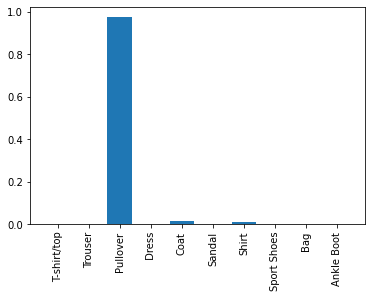

In [59]:
FMNIST_labels = ['T-shirt/top', 'Trouser', 'Pullover', ' Dress', 'Coat', 'Sandal', 'Shirt', 'Sport Shoes', 'Bag', 'Ankle Boot']
plt.xticks(np.arange(10), labels = FMNIST_labels, rotation = 'vertical')
plt.bar(np.arange(10), nps)

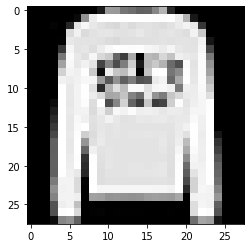

In [60]:
def denormalize(tensor):
  tensor = tensor * 0.5 + 0.5
  return tensor

img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img, cmap = 'gray')

# Q6 - Validation


Copy over the code from the using validation notebook, and execute the cells and enter the code with the instructor.

In [61]:
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [62]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                                ])
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download =True, train = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download =True, train = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

In [63]:
from torch import optim

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.01)

num_epochs = 3

for i in range(num_epochs):

  cum_loss = 0

  for images, labels in trainloader:

    #set_trace()

    optimizer.zero_grad()

    output = model(images)

    loss = criterion(output, labels)

    loss.backward()

    optimizer.step()

    cum_loss += loss.item()

  print(f"Traning loss: {cum_loss/len(trainloader)}")

Traning loss: 0.45657988680578243
Traning loss: 0.4329621690327425
Traning loss: 0.41544980674918525


In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

images, labels = next(iter(testloader))

test_image_id = 0

img = images[test_image_id].view(1,784)

with torch.no_grad():

  logps = model(img)

In [65]:
ps = torch.exp(logps)
ps

tensor([[9.8903e-01, 1.0600e-04, 1.6774e-03, 3.3503e-03, 2.2979e-06, 9.7775e-07,
         5.7244e-03, 2.4246e-08, 1.1011e-04, 1.6907e-08]])

In [66]:
nps = ps.numpy()[0]

nps

array([9.8902869e-01, 1.0599661e-04, 1.6773916e-03, 3.3502798e-03,
       2.2979441e-06, 9.7775285e-07, 5.7243579e-03, 2.4246347e-08,
       1.1010652e-04, 1.6906609e-08], dtype=float32)

<BarContainer object of 10 artists>

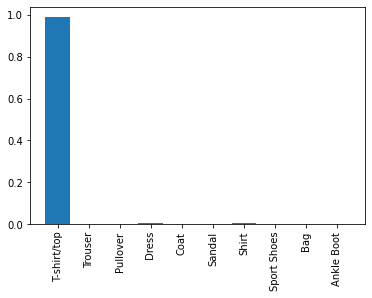

In [67]:
FMNIST_labels = ['T-shirt/top', 'Trouser', 'Pullover', ' Dress', 'Coat', 'Sandal', 'Shirt', 'Sport Shoes', 'Bag', 'Ankle Boot']
plt.xticks(np.arange(10), labels = FMNIST_labels, rotation = 'vertical')
plt.bar(np.arange(10), nps)

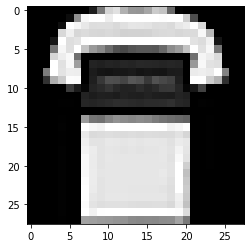

In [68]:
def denormalize(tensor):
  tensor = tensor * 0.5 + 0.5
  return tensor

img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img, cmap = 'gray')

In [69]:
with torch.no_grad():

  num_correct = 0
  total = 0

  cnt = 0

  for images, labels in testloader:

    logps = model(images)
    ourput = torch.exp(logps)
    print(output)
    cnt += 1

    if cnt > 0:

      break



tensor([[-1.4500e+01, -1.3285e+01, -1.3449e+01, -1.2690e+01, -1.2119e+01,
         -5.1302e+00, -1.4789e+01, -7.4008e-03, -8.0650e+00, -6.7843e+00],
        [-8.3848e+00, -9.1218e+00, -2.8247e+00, -9.7897e+00, -4.1512e-01,
         -1.2033e+01, -1.2746e+00, -1.8952e+01, -7.6688e+00, -1.6317e+01],
        [-7.0252e+00, -3.0496e+00, -7.1608e+00, -5.1351e-02, -7.7142e+00,
         -1.3002e+01, -9.7792e+00, -7.9744e+00, -8.7610e+00, -1.2281e+01],
        [-3.8943e+00, -8.4825e+00, -5.0659e-01, -5.4158e+00, -5.7048e+00,
         -8.4456e+00, -1.0063e+00, -1.5422e+01, -5.7018e+00, -1.4099e+01],
        [-6.8458e+00, -4.5405e+00, -5.2915e-01, -5.5126e+00, -9.6811e-01,
         -1.2314e+01, -4.2101e+00, -1.5522e+01, -7.6475e+00, -1.4874e+01],
        [-4.6150e+00, -3.9713e+00, -7.0352e+00, -3.3872e-02, -6.7800e+00,
         -1.3161e+01, -6.9600e+00, -6.8567e+00, -7.5507e+00, -1.1669e+01],
        [-1.0776e+01, -1.2172e-03, -9.4394e+00, -6.8620e+00, -9.7376e+00,
         -1.3614e+01, -1.5127e+0

In [70]:
with torch.no_grad():
  num_correct = 0

  tota = 0

  for images, labels in testloader:

    logps = model(images)
    output = torch.exp(logps)

    pred = torch.argmax(output, 1)
    total += labels.size(0)

In [71]:
pred, labels

(tensor([3, 3, 4, 9, 7, 3, 3, 2, 6, 4, 9, 2, 5, 7, 9, 6, 4, 3, 4, 4, 7, 6, 9, 5,
         7, 5, 9, 7, 4, 1, 0, 2]),
 tensor([3, 3, 4, 9, 7, 3, 3, 6, 6, 4, 9, 2, 5, 8, 9, 0, 4, 3, 4, 4, 7, 6, 9, 5,
         9, 5, 9, 7, 4, 1, 8, 6]))

In [72]:
pred == labels

tensor([ True,  True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True, False,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,  True,
        False, False])

In [73]:
with torch.no_grad():

  num_correct = 0

  total = 0

  for images, labels in testloader:

    logps = model(images)

    output = torch.exp(logps)

    pred = torch.argmax(output, 1)

    total += labels.size(0)

    num_correct += (pred == labels).sum().item()

  print(f'Accuracy og the model on the 10000 Test Images: {num_correct * 100 / total}% ')

Accuracy og the model on the 10000 Test Images: 85.44833333333334% 
